# **Image-enhancement-using-MIRNet**

## Download the LoL dataset from huggingface
(You can also use another dataset but make sure it is in the correct format, i.e., it must have folders named low and high containing the low light images and their corresponding ground truth images respectively )

In [1]:
!wget https://huggingface.co/datasets/geekyrakshit/LoL-Dataset/resolve/main/lol_dataset.zip
!unzip -q lol_dataset.zip && rm lol_dataset.zip

--2024-06-17 09:30:25--  https://huggingface.co/datasets/geekyrakshit/LoL-Dataset/resolve/main/lol_dataset.zip
Resolving huggingface.co (huggingface.co)... 3.163.189.74, 3.163.189.37, 3.163.189.114, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/d9/09/d909ef7668bb417b7065a311bd55a3084cc83a1f918e13cb41c5503328432db2/419fddc48958cd0f5599939ee0248852a37ceb8bb738c9b9525e95b25a89de9a?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27lol_dataset.zip%3B+filename%3D%22lol_dataset.zip%22%3B&response-content-type=application%2Fzip&Expires=1718875825&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxODg3NTgyNX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9kOS8wOS9kOTA5ZWY3NjY4YmI0MTdiNzA2NWEzMTFiZDU1YTMwODRjYzgzYTFmOTE4ZTEzY2I0MWM1NTAzMzI4NDMyZGIyLzQxOWZkZGM0ODk1OGNkMGY1NTk5OTM5ZWUwMjQ4ODUyYTM

## Clone the respository from github

In [2]:
!git clone https://github.com/abhishekbaghel11/Image-enhancement-using-MIRNet

Cloning into 'Image-enhancement-using-MIRNet'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 17), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (37/37), 18.09 KiB | 9.05 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [3]:
%cd Image-enhancement-using-MIRNet

/content/Image-enhancement-using-MIRNet


## Download the pre-trained weights using gdown
(You may also download the weights manually using the link: - https://drive.google.com/file/d/1-2ldSP3F5ZsA155lY1HA4PSqgbU78sXJ/view?usp=sharing)

In [4]:
!gdown 1-2ldSP3F5ZsA155lY1HA4PSqgbU78sXJ

Downloading...
From (original): https://drive.google.com/uc?id=1-2ldSP3F5ZsA155lY1HA4PSqgbU78sXJ
From (redirected): https://drive.google.com/uc?id=1-2ldSP3F5ZsA155lY1HA4PSqgbU78sXJ&confirm=t&uuid=19a88350-e708-4f82-ac0c-6052209306a4
To: /content/Image-enhancement-using-MIRNet/lol_485.h5
100% 179M/179M [00:03<00:00, 54.9MB/s]


# Keep your test files in the test/low folder and the resulting images will be saved in the test/predicted --> run the given code
(the folders should be in the directory where the Image-enhancement-using-MIRNet folder is located)


In [16]:
#create the test/predicted folder
!mkdir -p "../test/predicted"

In [ ]:
!python main.py --file_path '../test/low' --weights '/content/Image-enhancement-using-MIRNet/lol_485.h5' --save_dir '../test/predicted'

## Run the files

In [5]:
!mkdir -p '/content/save_weights'

In [7]:
!python train.py --data_path '/content/lol_dataset/our485' --learning_rate 2e-4 --epochs 3 --validation_split 20 --save_weights_path '/content/save_weights' --weights '/content/Image-enhancement-using-MIRNet/lol_485.h5'

2024-06-17 09:34:20.632133: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 09:34:20.632208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 09:34:20.634118: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 09:34:20.644708: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 09:34:21.990305: W tensorflow/compiler/tf2

In [8]:
!python test.py --file_path '/content/lol_dataset/eval15' --weights '/content/Image-enhancement-using-MIRNet/lol_485.h5' --save_result_img 0

2024-06-17 09:47:55.906543: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 09:47:55.906598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 09:47:55.908011: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 09:47:55.915075: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 09:47:56.959629: W tensorflow/compiler/tf2

In [17]:
!mkdir -p "../test/predicted"

In [10]:
!python main.py --file_path '../lol_dataset/eval15/low' --weights '/content/Image-enhancement-using-MIRNet/lol_485.h5' --save_dir '../test/predicted'

2024-06-17 09:51:01.028876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 09:51:01.028929: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 09:51:01.030229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-17 09:51:01.037384: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-17 09:51:02.048263: W tensorflow/compiler/tf2

# Printing some of the results

In [12]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import random

In [13]:
def plot_results(images, titles, figure_size=(12, 12)):
    fig = plt.figure(figsize=figure_size)
    for i in range(len(images)):
        fig.add_subplot(1, len(images), i + 1).set_title(titles[i])
        _ = plt.imshow(images[i])
        plt.axis("off")
    plt.show()

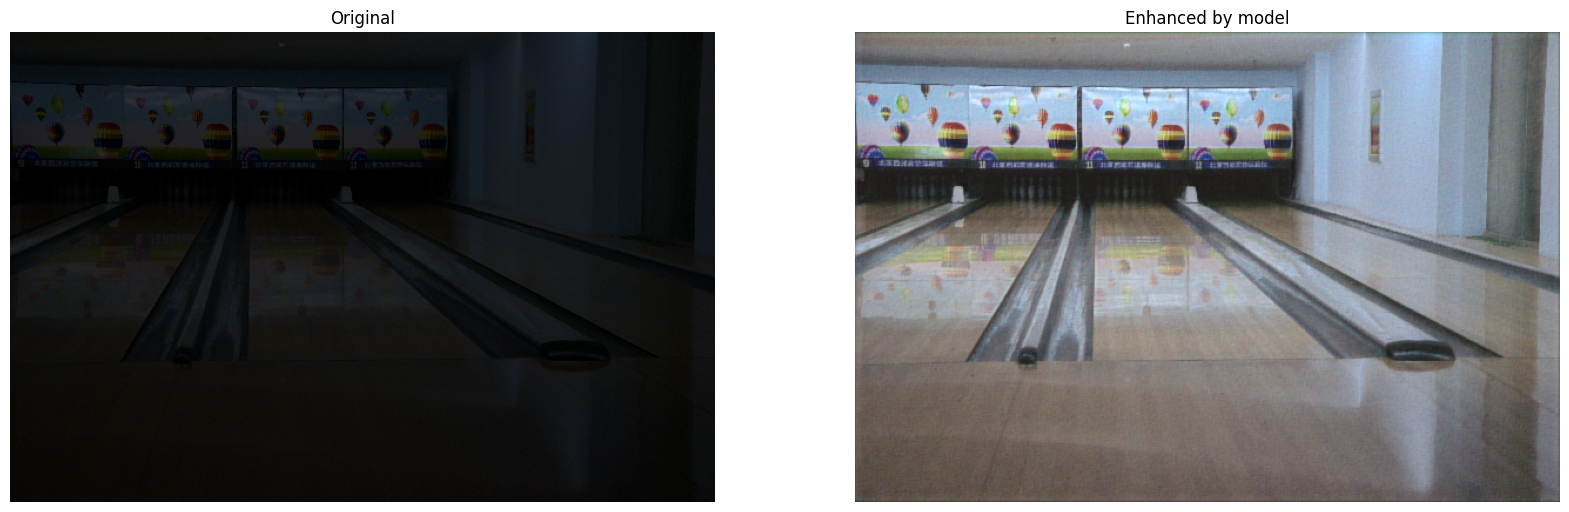

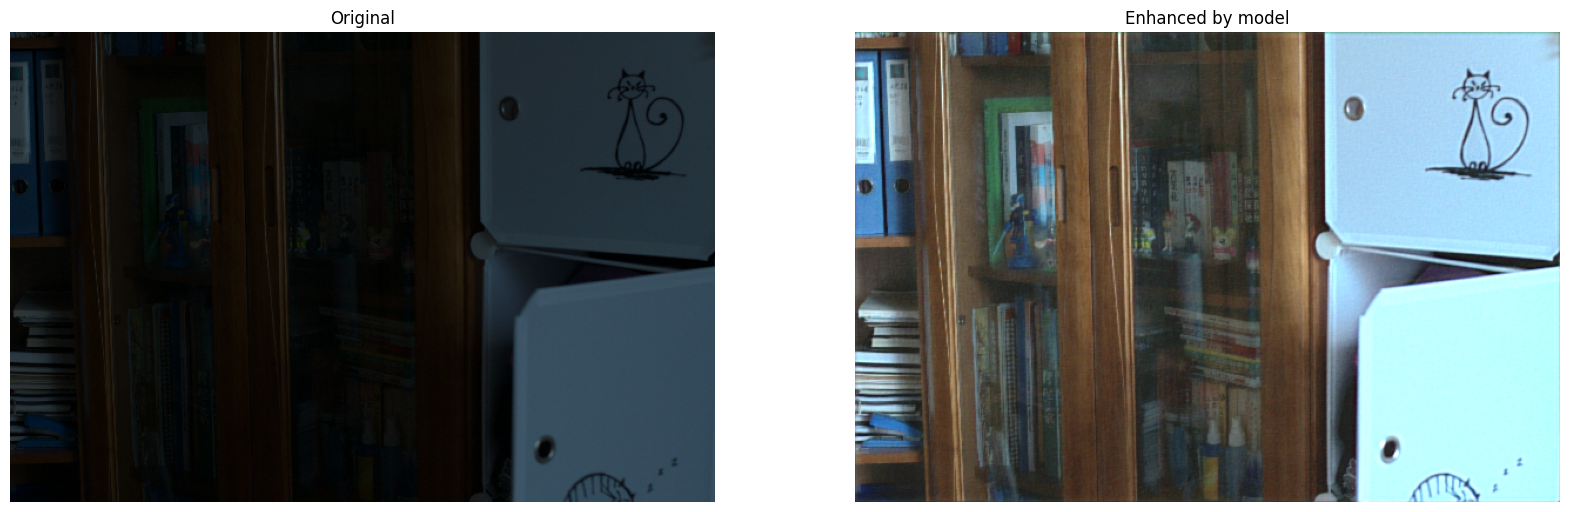

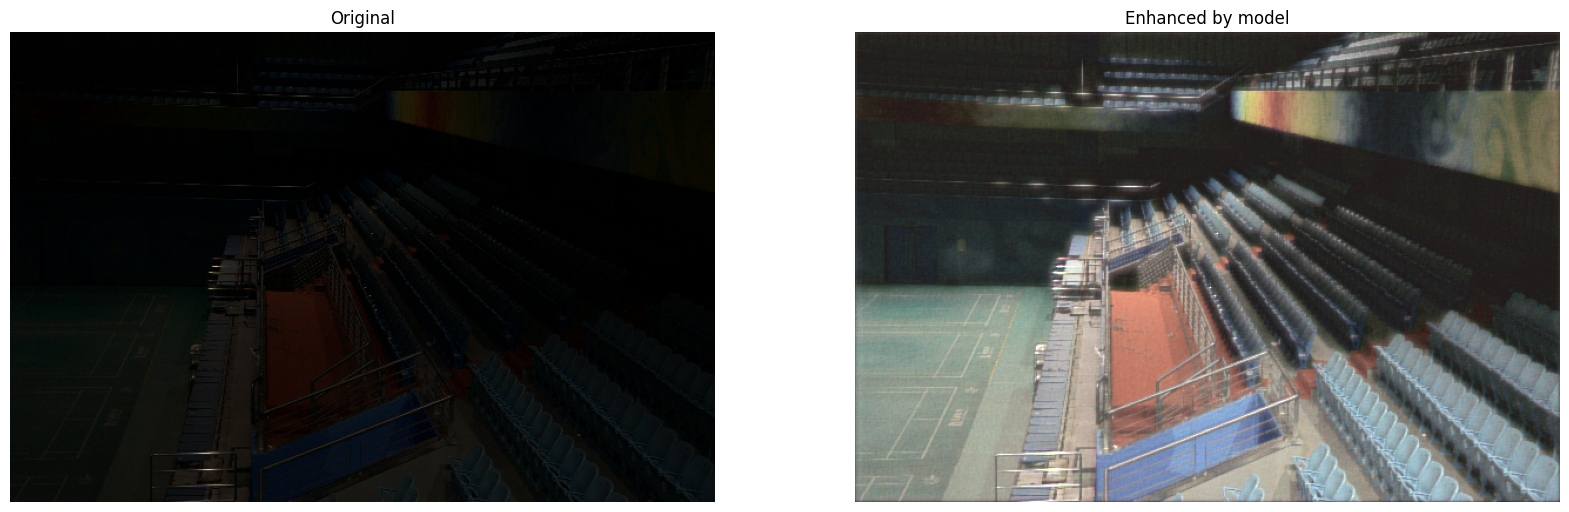

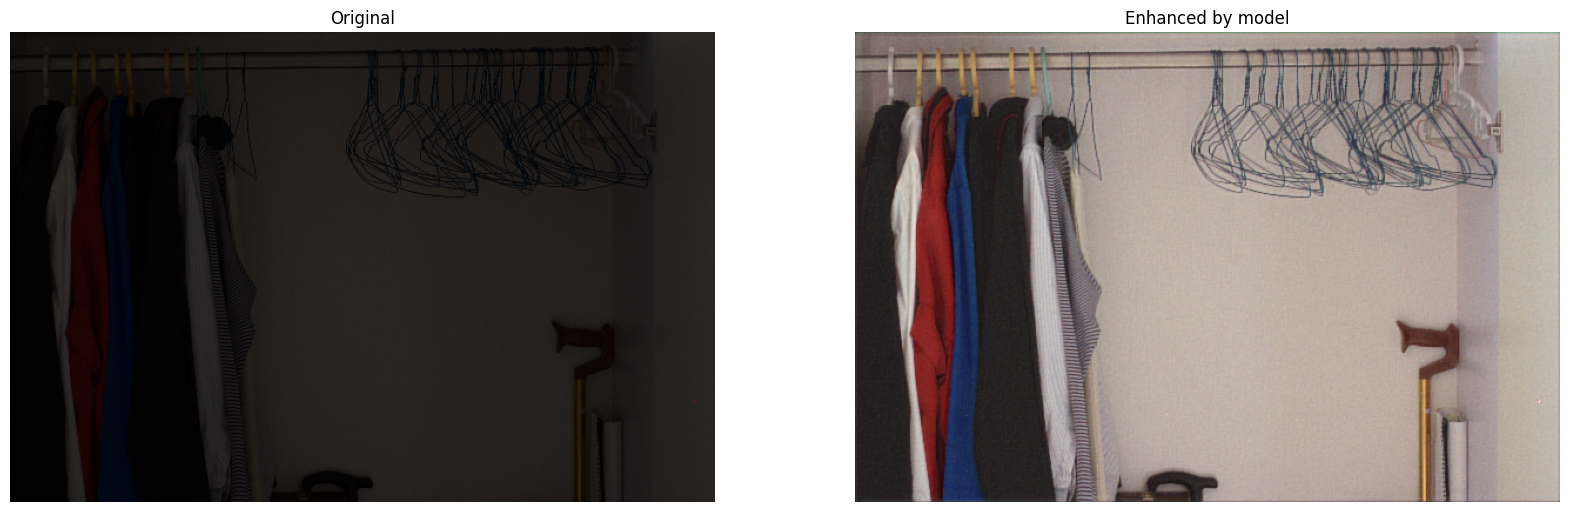

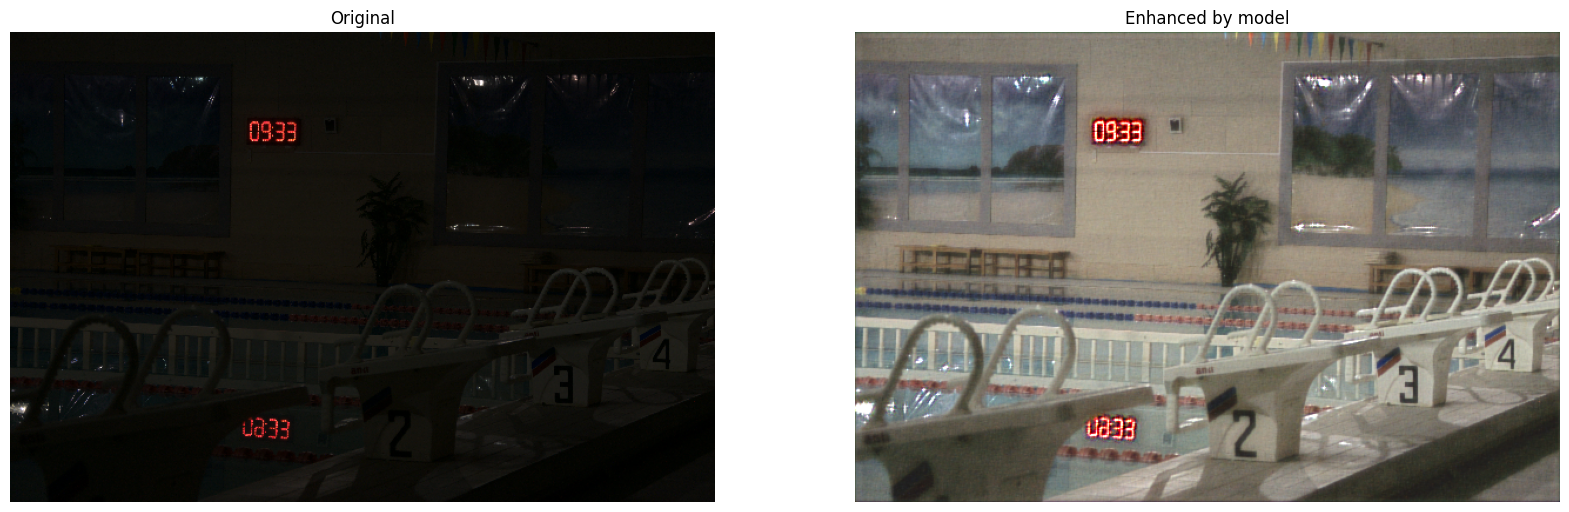

In [15]:
for low_light_image in random.sample(os.listdir('/content/lol_dataset/eval15/low'), 5):
    original_image = Image.open(os.path.join('/content/lol_dataset/eval15/low',low_light_image))
    low_light_image = low_light_image.split('.')[0] + '.png'
    enhanced_image = Image.open(os.path.join('/content/test/predicted',low_light_image))

    plot_results(
        [original_image, enhanced_image],
        ["Original","Enhanced by model"],
        (20, 12),
    )